<a href="https://colab.research.google.com/github/EHDEV/evergreen-content-classifier/blob/master/fastai_transfer_evergreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
# !pip install fastai

In [0]:
from fastai import *
from fastai.text import *

from google.colab import drive
import pandas as pd

In [0]:
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/"
pth =  "/content/drive/My Drive/"

In [0]:
# drive.mount('/content/drive')
data_file = 'evergreen_sample_bigger.csv'

df = pd.read_csv(f'{pth}/{data_file}')

In [0]:
train_df = df[df['is_valid'] == False]
valid_df = df[df['is_valid'] == True]

In [0]:
train_df = train_df.drop(train_df[train_df.text.isna()].index)
valid_df = valid_df.drop(valid_df[valid_df.text.isna()].index)

In [0]:
bs = 16

In [0]:
data_lm = TextLMDataBunch.from_df(pth,train_df=train_df, valid_df=valid_df, bs=bs)
data_clas = TextClasDataBunch.from_df(pth,train_df=train_df, valid_df=valid_df, bs=bs)
data_lm.save(f'{pth}/data_lm.pkl')

In [0]:
data_clas.show_batch()

text,target
xxbos ' xxmaj it 's xxmaj hard xxmaj to xxmaj lose xxmaj yourself xxmaj on xxmaj the xxmaj dance xxmaj floor xxmaj if xxmaj you 're xxmaj tweeting xxmaj the xxmaj song xxmaj you xxmaj just xxmaj xxunk xxmaj to xxmaj your xxmaj xxunk ' : xxmaj talking xxup dj xxmaj requests xxmaj with xxmaj xxunk xxmaj,negative
xxbos ' i xxmaj am xxmaj not xxmaj like xxmaj before ' : xxmaj sex xxmaj workers in xxmaj bangladesh 's xxmaj mega - xxmaj brothel xxmaj are xxmaj stuck in a xxmaj life of xxmaj drugs and xxmaj,negative
"xxbos xxmaj weekly xxmaj music xxmaj round - xxmaj up : xxmaj celebrity xxmaj halloween xxmaj costumes , xxmaj the xxup xxunk 's , xxmaj and xxmaj nickelback xxmaj xxunk xxmaj their xxmaj xxunk 's xxmaj",negative
xxbos xxmaj barbie xxmaj does a xxmaj lot of xxmaj drugs and xxmaj has a xxmaj lot of xxmaj sex in this xxmaj unofficial xxmaj video for xxup xxunk 's ' xxmaj john xxmaj doe,negative
"xxbos xxmaj brown xxmaj sabbath xxmaj delivers a xxmaj badass xxmaj black xxmaj sabbath xxmaj cover of ' xxmaj the xxmaj wizard , ' xxmaj featuring xxmaj black xxmaj angels ' xxmaj alex xxmaj",negative


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


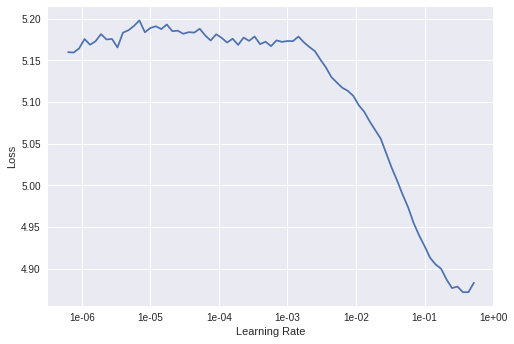

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
??learn.fit_one_cycle

In [0]:
moms = (0.8, 0.7)
# learn = language_model_learner(data_lm, pretrained_model=URLs.WT103)
# learn.unfreeze()
learn.fit_one_cycle(10, 1e-01, moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,3.814198,3.438862,0.452269,00:52
1,3.995098,3.856113,0.428279,00:52
2,4.318127,4.007454,0.419877,00:52
3,4.404657,3.988418,0.417579,00:52
4,4.255978,3.907231,0.426478,00:52
5,4.122698,3.830412,0.430020,00:52
6,3.934753,3.733227,0.435612,00:52
7,3.771269,3.675681,0.441189,00:52
8,3.608375,3.636985,0.443399,00:52
9,3.494870,3.633431,0.444511,00:52


In [0]:
learn.save(f'{pth}/fit_head_4')

learn.load(f'{pth}/fit_head_4')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, 1e-3, moms=moms)

In [0]:
learn.save(f'{pth}/fine_tuned')

In [0]:
learn.load_encoder(f'{pth}/fine_tuned_enc')

In [0]:
TEXT = "A South Korean-born NATO Soldier gives us the skinny on their contingency plan. Spoiler alert: they're totally fucked."
N_WORDS = 40
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

A South Korean-born NATO Soldier gives us the skinny on their contingency plan. Spoiler alert: they're totally fucked. xxbos An Ex - Media Model with Weird Donald Trump Go xxbos So Hard of His Workers xxbos These Long Video of Jim
A South Korean-born NATO Soldier gives us the skinny on their contingency plan. Spoiler alert: they're totally fucked. xxbos The Guide to Weed You Knew Your History xxbos How So Many Long Before Is Working and The World in the Idols


In [0]:
learn.save_encoder(f'{pth}/fine_tuned_enc')

In [0]:
# learn.save_encoder('enc')

learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder(f'{pth}/fine_tuned_enc')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


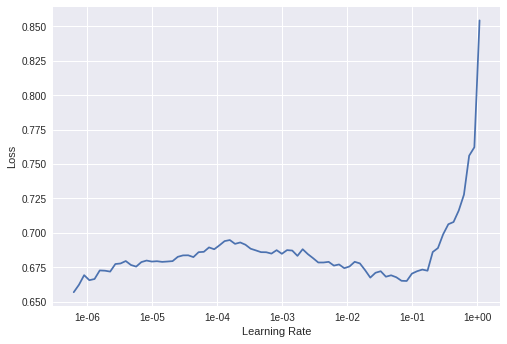

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-01, moms=moms)
# 1e-02	0.621266	0.644962	0.642857	00:39
# 1e-2	0.627414	0.619157	0.636857	00:40
# 1e-02	0.630747	0.610770	0.650000	00:40
# 1e-01 0.623658	0.616377	0.635429	00:40

epoch,train_loss,valid_loss,accuracy,time
0,0.623658,0.616377,0.635429,00:40


In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-04, 1e-02), moms=moms)

epoch,train_loss,valid_loss,accuracy,time
0,0.455487,0.576804,0.718857,01:31
1,0.484100,0.568707,0.717429,01:33
2,0.501354,0.571705,0.720286,01:31
3,0.448505,0.560487,0.725143,01:34
4,0.422211,0.594474,0.713714,01:32
5,0.377001,0.581079,0.722571,01:33
6,0.366176,0.594949,0.723429,01:32
7,0.353878,0.612377,0.724286,01:31


In [0]:
# learn.save_encoder(f'{pth}/clas_fine_tuned_16')
learn.load_encoder(f'{pth}/clas_fine_tuned_16')

In [0]:
# learn.data.add_test

In [0]:
??learn.predict(['We Asked Women How Much They Care About Men’s Height'], batch=True)

In [0]:
learn.predict("A South Korean-born NATO Soldier gives us the skinny on their contingency plan. Spoiler alert: they're totally fucked.")

(Category positive, tensor(1), tensor([0.0089, 0.9911]))

In [0]:
learn.predict("The latest generation of cheap iPhone X knockoffs come complete with the 'notch'")

(Category negative, tensor(0), tensor([0.6694, 0.3306]))

In [0]:
learn.predict("Listen to Steve Earle's New Song 'The Tennessee Kid'")

(Category negative, tensor(0), tensor([0.9623, 0.0377]))

In [0]:
learn.predict("What Did You Eat During the Super Bowl?")

'What Did You Eat During the Super Bowl? genetically'

In [0]:
learn.predict("Bulldogs Mid Mitch Wallis Kicks His Own Leg to Death")

(Category negative, tensor(0), tensor([0.5835, 0.4165]))

In [0]:
learn.predict("I Went to a Beach Party for Former Scientologists, Mormons, and Hasidic Jews")

(Category positive, tensor(1), tensor([0.3673, 0.6327]))

In [0]:
learn.predict("Bedienen is stressvoller dan een baan als hersenchirurg")

# MMA Coaches Weigh in on a Hypothetical Fight Between Trump and Biden

NameError: ignored